In [ ]:
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!
#Get Merged 1MM Dataset

In [4]:
import numpy as np
import matplotlib.pylab as py
import pandas as pd
import scipy.stats as st
np.set_printoptions(precision=2)
%matplotlib inline
import datetime
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None,
                      names=unames, engine='python')


rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None,
                        names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None,
                        names=mnames, engine='python')

data = pd.merge(pd.merge(ratings, users) , movies)

data.loc[data['age'] < 18 , 'age_interval'] = "0-17"
data.loc[(data['age'] >= 18) & (data['age'] < 25), 'age_interval'] = "18-24"
data.loc[(data['age'] >= 25) & (data['age'] < 35), 'age_interval'] = "25-34"
data.loc[(data['age'] >= 35)  & (data['age'] < 45), 'age_interval'] = "35-44"
data.loc[(data['age'] >= 45) & (data['age'] < 50), 'age_interval'] = "45-49"
data.loc[(data['age'] >= 50) & (data['age'] < 56), 'age_interval'] = "50-55"
data.loc[data['age'] >= 56, 'age_interval'] = "56+"

data['timestamp'] = map(lambda line: datetime.datetime.fromtimestamp(line).strftime('%b/%d/%Y'), data['timestamp']) 
data["month"] = map(lambda line: str(line).split("/")[0], data['timestamp']) 
Merged_hdf_datastore = pd.HDFStore('Merged_hdf_datastore_data6.h5')
print Merged_hdf_datastore
Merged_hdf_datastore['data'] = data

<class 'pandas.io.pytables.HDFStore'>
File path: Merged_hdf_datastore_data6.h5
/data            frame        (shape->[1000209,12])


In [ ]:
data

In [129]:
#Get Top 50 Rating COUNT by Month and Zip code.
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,age_interval
0,1,1193,5,2000,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,0-17
1,2,1193,5,2000,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,56+
2,12,1193,4,2000,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
3,15,1193,4,2000,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
4,17,1193,5,2000,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,50-55
5,18,1193,4,2000,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama,18-24
6,19,1193,5,2001,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama,0-17
7,24,1193,5,2000,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
8,28,1193,3,2000,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama,25-34
9,33,1193,5,2001,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama,45-49


In [5]:
d2 = data[["month","zip","rating"]]
d3 = d2.groupby(["month","zip"]).rating.size().sort_values(ascending=False)
d4 = d3[0:50:]


In [ ]:
#Get the info on Zip vs Month with TOP 10 Rating count.

In [6]:
K = data[data['zip'].isin(["96707-1321","95380","77006","08904","22903","06460","10024","53706","92120","60640"])]
C=K.pivot_table('rating',index='month',columns=['zip'],aggfunc='count')
C

zip,06460,08904,10024,22903,53706,60640,77006,92120,95380,96707-1321
month,,,,,,,,,,
Apr,32,3,89,14,2,6,NaN,2,NaN,NaN
Aug,31,14,151,5,NaN,572,1804,229,26,NaN
Dec,2,146,5,407,1497,123,NaN,29,1,NaN
Feb,2,65,2,20,67,12,NaN,62,NaN,NaN
Jan,11,NaN,270,129,47,399,NaN,7,NaN,NaN
Jul,8,9,11,69,NaN,94,24,61,NaN,1945
Jun,4,274,60,45,31,22,NaN,378,NaN,NaN
Mar,36,NaN,1,5,4,12,NaN,22,NaN,NaN
May,9,1734,465,5,140,755,NaN,1422,NaN,NaN


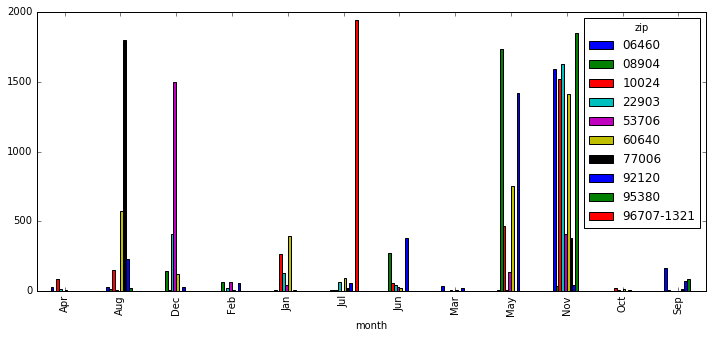

In [9]:
import matplotlib as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12 #w
fig_size[1] = 5 #H
plt.rcParams["figure.figsize"] = fig_size
C.plot(kind="bar")#,x="10024",y="22903")

In [ ]:
'''
Zip code info for top 10 rated zipcodes
96707-1321 - Hawaii
95380 - CA
77006 - TX
08904 - NJ
22903 - VA (virginia)
06460 - CT
10024 - NY
53706 - WI
92120 - CA (SD)
60640 - IL
'''

In [ ]:
'''###################################################################################################################'''
# As we can see Nov is where we have lot ot ratting traffic.
#TOP 3 zip codes with highest rating in NOV is from  CT,NJ,VA 
#Which menas, for the given dataset - people in East coast thend to watch more movies in November, due to "WINTER".
#Another prediction would be dure to holidays "Thanks giving" where families get together as a tradition. 


In [ ]:
### Movie Rating COUNT based on age group over period of time ####

In [10]:
d2 = data[["month","zip","rating"]]
d3 = d2.groupby(["month","zip"]).rating.size().sort_values(ascending=False)
d4 = d3[0:50:]


In [ ]:
#User Age distribution in given dataset

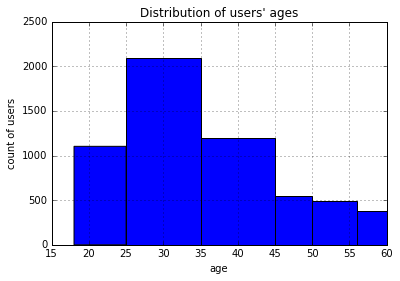

In [14]:
#User Age distribution in given dataset
import matplotlib.pyplot as plt
users.age.hist(bins=(18,25,35,45,50,56,60))#(15,20,25,30,35,40,45,50,55,60))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6 #w
fig_size[1] = 4 #H
plt.rcParams["figure.figsize"] = fig_size
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')

In [ ]:
#User of age group 25-35 are significantly large in the given dataset.

In [15]:
data = data.sort_values(by="age_interval",ascending = False)


In [19]:
import numpy as np
import matplotlib.pylab as py
import pandas as pd
import scipy.stats as st
np.set_printoptions(precision=2)
%matplotlib inline
import datetime
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None,
                      names=unames, engine='python')


rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None,
                        names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None,
                        names=mnames, engine='python')

data1 = pd.merge(pd.merge(ratings, users) , movies)

data1.loc[data1['age'] < 18 , 'age_interval'] = "0-17"
data1.loc[(data1['age'] >= 18) & (data1['age'] < 25), 'age_interval'] = "18-24"
data1.loc[(data1['age'] >= 25) & (data1['age'] < 35), 'age_interval'] = "25-34"
data1.loc[(data1['age'] >= 35)  & (data1['age'] < 45), 'age_interval'] = "35-44"
data1.loc[(data1['age'] >= 45) & (data1['age'] < 50), 'age_interval'] = "45-49"
data1.loc[(data1['age'] >= 50) & (data1['age'] < 56), 'age_interval'] = "50-55"
data1.loc[data1['age'] >= 56, 'age_interval'] = "56+"

data1['timestamp'] = map(lambda line: datetime.datetime.fromtimestamp(line).strftime('%Y'), data1['timestamp']) 
Merged_hdf_datastore = pd.HDFStore('Merged_hdf_datastore_data7.h5')
print Merged_hdf_datastore
Merged_hdf_datastore['data1'] = data1

<class 'pandas.io.pytables.HDFStore'>
File path: Merged_hdf_datastore_data7.h5
/data1            frame        (shape->[1000209,11])


In [18]:
#Get highest rating count byt aged and time

In [20]:
kk = count_group_by_age = data1.groupby(['age_interval','timestamp']).rating.size()#.order(ascending=False)


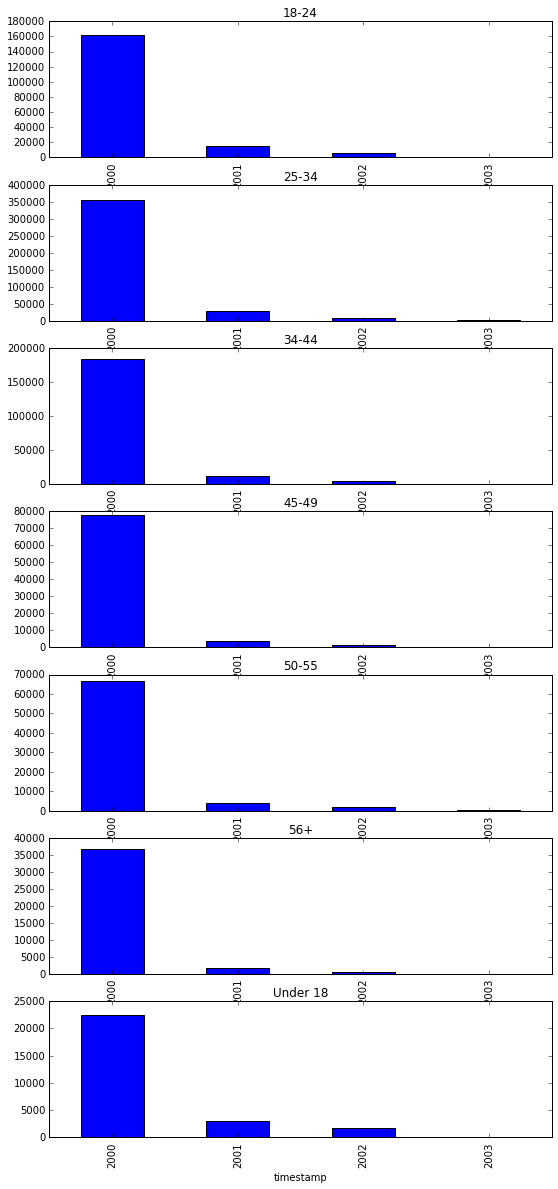

In [21]:

import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9 #w
fig_size[1] = 20 #H
plt.rcParams["figure.figsize"] = fig_size
f, a = plt.subplots(7,1)
print
kk.xs('18-24').plot(kind='bar',ax=a[0],title='18-24')
kk.xs('25-34').plot(kind='bar',ax=a[1],title='25-34')
kk.xs('35-44').plot(kind='bar',ax=a[2],title='34-44')
kk.xs('45-49').plot(kind='bar',ax=a[3],title='45-49')
kk.xs('50-55').plot(kind='bar',ax=a[4],title='50-55')
kk.xs('56+').plot(kind='bar',ax=a[5],title='56+')
kk.xs('0-17').plot(kind='bar',ax=a[6],title='Under 18')


In [ ]:
#Better plot...!!!

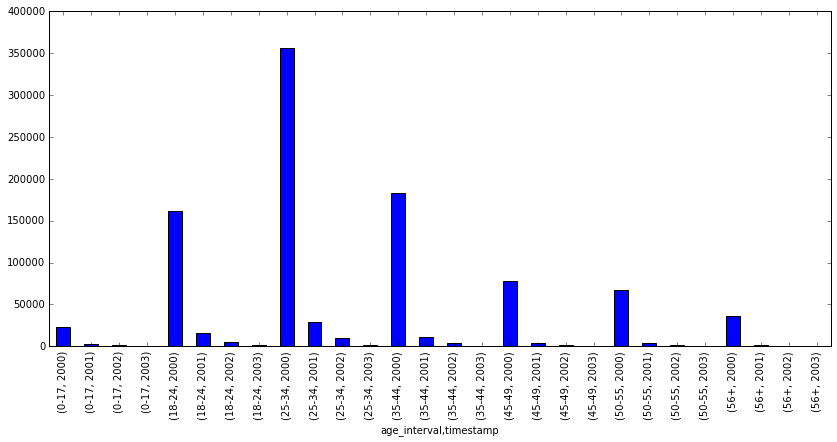

In [22]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14 #w
fig_size[1] = 6 #H
plt.rcParams["figure.figsize"] = fig_size
kk.plot(kind='bar')

In [ ]:
#looking at the rating traffic within each age group over the period of 2000 to 2003.
#with the given dataset - the rating traffic has significantly gone down across different age group from 2000 to 2003. 
#we could have different conclusion based on our dataset.
# 1. since the movies in our dataset are dated - may be people stopped watching old movies over the time (in 2002 - 2003) and new movies 
#     started trending by then.
# 2. May be there were relatively less popular or good movies over the period 2002 - 2003  compared to 2000/2001, and all the old popular movies 
#    were already watched and rated by 2000 -2001.